<a href="https://colab.research.google.com/github/Gus-1003/Geoestatistica_Estudos_Dados/blob/main/Semagraria/Patricia_aula1_dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Dataframes* no Python

Itens a serem vistos:

- leitura de *dataframes* com o pandas  
- manipulação de *dataframes*  
- medidas resumo
- gráficos e diagramas de dispersão

*Dataframes*:

- expressam o conteúdo de planilhas
- uma das principais estruturas de dados (usamos o pacote *pandas*)
- bidimensionais e heterogêneos
- linhas representam as observações (começando na posição 0)
- colunas representam as variáveis
- podem ser importados (.csv, .xls etc.) ou podem ser criados

In [5]:
import pandas as pd

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

**Usando pandas (dataframes)**

Lendo arquivo csv a partir de um link. Os dados foram retirados do PAM (Produção Agrícola Municipal) do IBGE: 

- dados de MG em 2017 
- quantidade total (toneladas) produzida de 14 culturas
- informações por município

In [6]:
# ler uma planilha csv
dados = pd.read_csv('https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/qtde-14.csv', encoding='latin1')

In [7]:
# visualizar parte das linhas do dataframe
dados.head()

,ibge7,mun,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,0,30,460,0,18,0,0,0,1212,100
1,3100203,Abaeté,Central Mineira,540,0,0,0,0,0,9000,0,0,0,0,0,0,0
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,3140,9000,0,170,0,0,0,0,0
3,3100401,Acaiaca,Zona da Mata,0,0,2,0,0,3,1340,0,33,0,7,0,0,0
4,3100500,Açucena,Vale do Rio Doce,0,3,6,0,0,10,3000,0,74,0,0,0,0,0


Lendo arquivo csv salvo no computador:

Primeiro é preciso carregar o arquivo no painel à esquerda

- Arquivos > Fazer upload


In [8]:
# ler um arquivo salvo no computador
dados1 = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/Geoestatistica_Estudos_Dados/main/Semagraria/populacao_argentina.csv', encoding='latin1')
dados1.head()

,prov,abr,status,capital,area,Pop_1980,Pop_1991,Pop_2001,Pop_2010,Pop_2011,Pop_2017
0,Buenos Aires,BA,Prov,La Plata,307571,10865408,12594974,13827203,15625084,15909600,17020000
1,Catamarca,CAT,Prov,Catamarca,102602,207717,264234,334568,367828,3815,4044
2,Chaco,CHA,Prov,Resistencia,99633,701392,839677,984446,1055259,1092600,1168200
3,Chubut,CHU,Prov,Rawson,224686,263116,357189,413237,509108,5242,588
4,Ciudad de Buenos Aires,DF,Dist,Buenos Aires,203,2922829,2965403,2776138,2890151,3033600,3063700


Não usaremos esse conjunto de dados nessa aula. Ele serviu apenas para exemplificar como carregar um arquivo que está salvo no computador.

Continuando com o conjunto de dados do PAM 2017:

In [9]:
# verificar os tipos de dados
dados.dtypes

ibge7              int64
mun               object
nome_meso         object
abacaxi            int64
alho               int64
amendoim           int64
azeitona           int64
batata_inglesa     int64
cafe_arab          int64
cana               int64
ervilha            int64
feijao             int64
girassol           int64
laranja            int64
marmelo            int64
sorgo              int64
tomate             int64
dtype: object

In [10]:
# nomes das variáveis
dados.columns

Index(['ibge7', 'mun', 'nome_meso', 'abacaxi', 'alho', 'amendoim', 'azeitona',
       'batata_inglesa', 'cafe_arab', 'cana', 'ervilha', 'feijao', 'girassol',
       'laranja', 'marmelo', 'sorgo', 'tomate'],
      dtype='object')

In [11]:
# renomear colunas
# 'ibge7' será 'mun' (código do município)
# 'mun' será 'município' (nome do município)
dados.rename(columns={'mun': 'municipio'}, inplace=True)  # inplace = True modifica o dataframe
dados.rename(columns={'ibge7': 'mun'}, inplace=True)

In [12]:
# mostrar apenas os valores
dados.values

array([[3100104, 'Abadia dos Dourados',
        'Triângulo Mineiro/Alto Paranaíba', ..., 0, 1212, 100],
       [3100203, 'Abaeté', 'Central Mineira', ..., 0, 0, 0],
       [3100302, 'Abre Campo', 'Zona da Mata', ..., 0, 0, 0],
       ...,
       [3172004, 'Visconde do Rio Branco', 'Zona da Mata', ..., 0, 0, 0],
       [3172103, 'Volta Grande', 'Zona da Mata', ..., 0, 0, 0],
       [3172202, 'Wenceslau Braz', 'Sul/Sudoeste de Minas', ..., 0, 0, 0]],
      dtype=object)

In [13]:
# transpor se necessário
dados.T

,0,1,2,3,4,5,6,7,8,9,...,843,844,845,846,847,848,849,850,851,852
mun,3100104,3100203,3100302,3100401,3100500,3100609,3100708,3100807,3100906,3101003,...,3171303,3171402,3171501,3171600,3171709,3171808,3171907,3172004,3172103,3172202
municipio,Abadia dos Dourados,Abaeté,Abre Campo,Acaiaca,Açucena,Água Boa,Água Comprida,Aguanil,Águas Formosas,Águas Vermelhas,...,Viçosa,Vieiras,Mathias Lobato,Virgem da Lapa,Virgínia,Virginópolis,Virgolândia,Visconde do Rio Branco,Volta Grande,Wenceslau Braz
nome_meso,Triângulo Mineiro/Alto Paranaíba,Central Mineira,Zona da Mata,Zona da Mata,Vale do Rio Doce,Vale do Rio Doce,Triângulo Mineiro/Alto Paranaíba,Oeste de Minas,Vale do Mucuri,Norte de Minas,...,Zona da Mata,Zona da Mata,Vale do Rio Doce,Jequitinhonha,Sul/Sudoeste de Minas,Vale do Rio Doce,Vale do Rio Doce,Zona da Mata,Zona da Mata,Sul/Sudoeste de Minas
abacaxi,0,540,0,0,0,0,0,0,0,0,...,0,0,0,13,0,0,0,0,0,0
alho,0,0,0,0,3,0,0,0,0,0,...,0,0,0,3,12,0,0,0,0,0
amendoim,0,0,0,2,6,4,0,0,0,0,...,0,0,0,1,0,0,3,0,0,0
azeitona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
batata_inglesa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3600,0,0,0,0,0
cafe_arab,30,0,3140,3,10,1740,0,1801,0,1200,...,1280,870,0,0,91,107,39,7,0,0
cana,460,9000,9000,1340,3000,6174,1190000,10920,1080,75,...,3660,960,0,1200,0,6560,1100,17560,96,360


**Medidas resumo (estatísticas)**

In [14]:
# resumo estatístico de uma variável
dados.describe()

,mun,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,3.136982e+06,263.050410,47.317702,14.404455,0.324736,1103.856975,1685.029308,8.171594e+04,2.425557,584.338804,16.218054,1115.169988,0.189918,875.453693,670.894490
std,2.072104e+04,3233.696873,703.089075,231.172947,3.412393,8653.588761,4408.757927,4.237532e+05,38.429689,3462.123081,217.716423,10910.119355,4.949182,5387.953822,3986.158435
min,3.100104e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.119500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+02,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.137304e+06,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.248000e+03,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.154903e+06,0.000000,0.000000,0.000000,0.000000,0.000000,842.000000,4.000000e+03,0.000000,175.000000,0.000000,12.000000,0.000000,0.000000,60.000000
max,3.172202e+06,60000.000000,16830.000000,5508.000000,76.000000,177400.000000,56115.000000,6.768000e+06,913.000000,68400.000000,5137.000000,202400.000000,144.000000,112500.000000,72000.000000


In [15]:
dados.iloc[:, 3:].describe()

,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,263.050410,47.317702,14.404455,0.324736,1103.856975,1685.029308,8.171594e+04,2.425557,584.338804,16.218054,1115.169988,0.189918,875.453693,670.894490
std,3233.696873,703.089075,231.172947,3.412393,8653.588761,4408.757927,4.237532e+05,38.429689,3462.123081,217.716423,10910.119355,4.949182,5387.953822,3986.158435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+02,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.248000e+03,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,842.000000,4.000000e+03,0.000000,175.000000,0.000000,12.000000,0.000000,0.000000,60.000000
max,60000.000000,16830.000000,5508.000000,76.000000,177400.000000,56115.000000,6.768000e+06,913.000000,68400.000000,5137.000000,202400.000000,144.000000,112500.000000,72000.000000


In [16]:
# média
dados.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


mun               3.136982e+06
abacaxi           2.630504e+02
alho              4.731770e+01
amendoim          1.440445e+01
azeitona          3.247362e-01
batata_inglesa    1.103857e+03
cafe_arab         1.685029e+03
cana              8.171594e+04
ervilha           2.425557e+00
feijao            5.843388e+02
girassol          1.621805e+01
laranja           1.115170e+03
marmelo           1.899179e-01
sorgo             8.754537e+02
tomate            6.708945e+02
dtype: float64

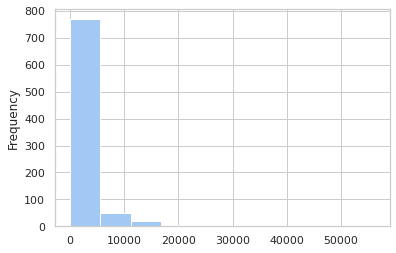

In [17]:
# histograma de uma das culturas
dados.cafe_arab.plot.hist();

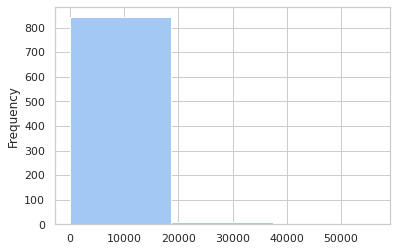

In [18]:
dados.cafe_arab.plot.hist(bins=3);

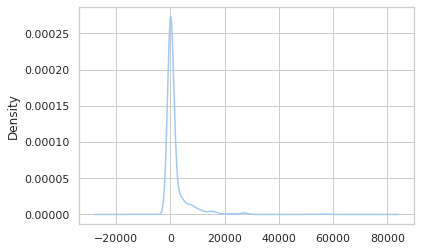

In [19]:
# histograma suavizado
dados.cafe_arab.plot.kde();

In [20]:
# valor máximo de uma variável
dados.cafe_arab.max()

56115

In [21]:
# retornar o município com valor máximo de alguma variável
dados.sort_values('cafe_arab', ascending=False).head(10)

,mun,municipio,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
561,3148103,Patrocínio,Triângulo Mineiro/Alto Paranaíba,70,40,21,0,13125,56115,360,0,5910,0,1540,0,14574,3312
125,3111606,Campos Gerais,Sul/Sudoeste de Minas,50,0,0,0,2400,28085,1200,0,3136,0,6,0,0,1700
449,3139003,Machado,Sul/Sudoeste de Minas,0,0,0,0,1810,27600,28000,0,900,0,40,0,0,960
37,3103504,Araguari,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,3325,27550,2160,0,90,890,0,0,12600,72000
814,3169406,Três Pontas,Sul/Sudoeste de Minas,0,0,0,0,0,26950,235,0,50,0,5,0,518,40
75,3107109,Boa Esperança,Sul/Sudoeste de Minas,0,0,3,0,0,26570,360,0,1176,0,0,0,0,0
454,3139409,Manhuaçu,Zona da Mata,0,0,0,0,0,26274,64,0,189,0,0,0,0,425
523,3145109,Nova Resende,Sul/Sudoeste de Minas,0,0,0,0,2650,23550,208,0,270,0,1700,0,0,0
496,3143104,Monte Carmelo,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,0,22430,960,0,875,139,0,0,12120,240
118,3111002,Campestre,Sul/Sudoeste de Minas,0,0,0,0,1820,21060,850,0,312,0,831,0,0,665


In [22]:
# como seria para mostrar o menor valor?
dados.sort_values('cafe_arab', ascending=True).head(20)

,mun,municipio,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
426,3137304,Lagoa dos Patos,Norte de Minas,0,0,0,0,0,0,120,0,35,0,0,0,18,0
474,3141009,Mato Verde,Norte de Minas,0,0,0,0,0,0,90,0,29,0,0,0,178,0
472,3140852,Matias Cardoso,Norte de Minas,0,0,55,0,0,0,30200,0,225,0,672,0,70,9900
471,3140803,Matias Barbosa,Zona da Mata,0,0,0,0,0,0,648,0,30,0,0,0,0,0
466,3140506,Martinho Campos,Central Mineira,0,280,0,0,0,0,2000,0,453,0,0,0,857,0
465,3140407,Marmelópolis,Sul/Sudoeste de Minas,0,0,0,0,80,0,120,0,5,0,0,8,0,440
463,3140209,Maripá de Minas,Zona da Mata,0,0,0,0,0,0,938,0,17,0,10,0,0,0
462,3140159,Mário Campos,Metropolitana de Belo Horizonte,0,30,0,0,0,0,30,0,1,0,0,0,0,0
461,3140100,Marilac,Vale do Rio Doce,0,0,0,0,0,0,1300,0,44,0,0,0,56,3000
457,3139706,Maravilhas,Metropolitana de Belo Horizonte,0,0,0,0,0,0,920,0,5,0,6,0,0,6650


In [23]:
# variância
dados.cana.var()

179566784786.87494

In [24]:
# desvio padrão
dados.cana.std()

423753.21212573117

In [25]:
# correlação entre duas variáveis
dados.cana.corr(dados.cafe_arab)

-0.008743627750271715

In [26]:
# correlação entre todas as variáveis do conjunto de dados
dados.corr()

,mun,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
mun,1.000000,-0.029245,0.019163,0.053401,-0.085612,0.062607,-0.027412,0.042990,0.030767,0.025753,0.061264,0.012154,0.046160,0.026690,-0.008846
abacaxi,-0.029245,1.000000,-0.005401,0.311313,-0.007750,-0.007335,-0.027552,0.339455,0.002212,0.002554,0.193833,0.379249,-0.003041,0.154145,-0.007620
alho,0.019163,-0.005401,1.000000,-0.004172,-0.006114,0.189722,0.149146,-0.001231,-0.003277,0.029185,-0.001814,-0.006394,-0.002440,0.015454,0.000229
amendoim,0.053401,0.311313,-0.004172,1.000000,-0.005937,-0.007796,-0.018219,0.416414,-0.003930,0.029681,0.313261,0.177811,-0.002394,0.123571,-0.007993
azeitona,-0.085612,-0.007750,-0.006114,-0.005937,1.000000,0.034534,-0.023600,-0.018273,0.002194,-0.011210,-0.007097,-0.009380,-0.003656,-0.015481,0.006580
batata_inglesa,0.062607,-0.007335,0.189722,-0.007796,0.034534,1.000000,0.126766,0.277787,0.011120,0.103921,0.017892,0.005383,-0.004883,0.354329,0.017287
cafe_arab,-0.027412,-0.027552,0.149146,-0.018219,-0.023600,0.126766,1.000000,-0.008744,0.083092,0.129879,0.033964,-0.001148,-0.013673,0.104855,0.206868
cana,0.042990,0.339455,-0.001231,0.416414,-0.018273,0.277787,-0.008744,1.000000,0.000592,0.255931,0.131656,0.263873,0.000153,0.677363,0.018907
ervilha,0.030767,0.002212,-0.003277,-0.003930,0.002194,0.011120,0.083092,0.000592,1.000000,0.025996,-0.004707,-0.004786,-0.002425,0.103436,0.236461
feijao,0.025753,0.002554,0.029185,0.029681,-0.011210,0.103921,0.129879,0.255931,0.025996,1.000000,0.016006,0.004433,-0.003303,0.270192,0.048691


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


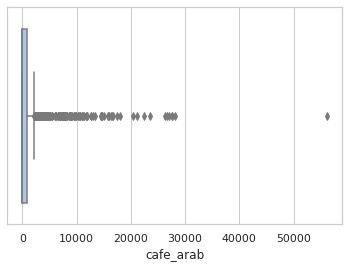

In [27]:
sns.boxplot(dados.cafe_arab, orient='v');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


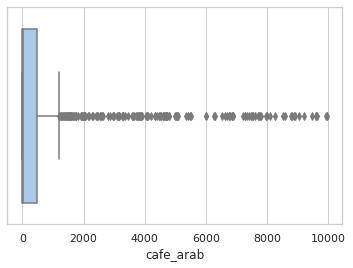

In [28]:
sns.boxplot(dados.query('cafe_arab < 10000').cafe_arab, orient='v');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


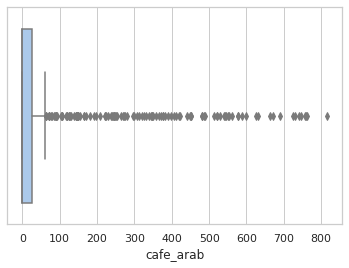

In [29]:
q3 = dados.cafe_arab.quantile(.75)   # terceiro quartil
sns.boxplot(dados.query('cafe_arab < @q3').cafe_arab, orient='v');

**Diagrama de dispersão**

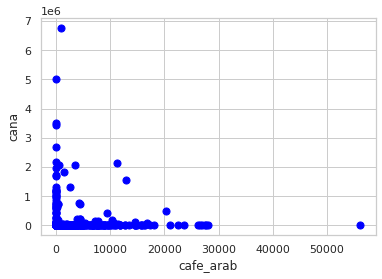

In [30]:
dados.plot.scatter('cafe_arab', 'cana', s=50, c='blue');

In [31]:
dados.describe()

,mun,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,3.136982e+06,263.050410,47.317702,14.404455,0.324736,1103.856975,1685.029308,8.171594e+04,2.425557,584.338804,16.218054,1115.169988,0.189918,875.453693,670.894490
std,2.072104e+04,3233.696873,703.089075,231.172947,3.412393,8653.588761,4408.757927,4.237532e+05,38.429689,3462.123081,217.716423,10910.119355,4.949182,5387.953822,3986.158435
min,3.100104e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.119500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+02,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.137304e+06,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.248000e+03,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.154903e+06,0.000000,0.000000,0.000000,0.000000,0.000000,842.000000,4.000000e+03,0.000000,175.000000,0.000000,12.000000,0.000000,0.000000,60.000000
max,3.172202e+06,60000.000000,16830.000000,5508.000000,76.000000,177400.000000,56115.000000,6.768000e+06,913.000000,68400.000000,5137.000000,202400.000000,144.000000,112500.000000,72000.000000


In [32]:
# mostrar os 5 municípios com maiores produções de café
dados.sort_values('cafe_arab', ascending=False).round(0).head(5)

,mun,municipio,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
561,3148103,Patrocínio,Triângulo Mineiro/Alto Paranaíba,70,40,21,0,13125,56115,360,0,5910,0,1540,0,14574,3312
125,3111606,Campos Gerais,Sul/Sudoeste de Minas,50,0,0,0,2400,28085,1200,0,3136,0,6,0,0,1700
449,3139003,Machado,Sul/Sudoeste de Minas,0,0,0,0,1810,27600,28000,0,900,0,40,0,0,960
37,3103504,Araguari,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,3325,27550,2160,0,90,890,0,0,12600,72000
814,3169406,Três Pontas,Sul/Sudoeste de Minas,0,0,0,0,0,26950,235,0,50,0,5,0,518,40


In [33]:
# agrupar por meso
dados.groupby('nome_meso').cafe_arab.mean()

nome_meso
Campo das Vertentes                  899.111111
Central Mineira                       28.900000
Jequitinhonha                        266.078431
Metropolitana de Belo Horizonte       11.752381
Noroeste de Minas                   1634.000000
Norte de Minas                       184.853933
Oeste de Minas                      2273.727273
Sul/Sudoeste de Minas               4547.801370
Triângulo Mineiro/Alto Paranaíba    4009.803030
Vale do Mucuri                        64.217391
Vale do Rio Doce                     667.009804
Zona da Mata                        1715.570423
Name: cafe_arab, dtype: float64

In [34]:
# ordenar o resultado anterior
dados.groupby('nome_meso').cafe_arab.mean().sort_values(ascending=False).round(2)

nome_meso
Sul/Sudoeste de Minas               4547.80
Triângulo Mineiro/Alto Paranaíba    4009.80
Oeste de Minas                      2273.73
Zona da Mata                        1715.57
Noroeste de Minas                   1634.00
Campo das Vertentes                  899.11
Vale do Rio Doce                     667.01
Jequitinhonha                        266.08
Norte de Minas                       184.85
Vale do Mucuri                        64.22
Central Mineira                       28.90
Metropolitana de Belo Horizonte       11.75
Name: cafe_arab, dtype: float64

**Mostrar valores que atendam a alguma condição específica:**

In [35]:
# Mostrar os municípios que têm produção da cultura
dados.query('cafe_arab > 0')

,mun,municipio,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,0,30,460,0,18,0,0,0,1212,100
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,3140,9000,0,170,0,0,0,0,0
3,3100401,Acaiaca,Zona da Mata,0,0,2,0,0,3,1340,0,33,0,7,0,0,0
4,3100500,Açucena,Vale do Rio Doce,0,3,6,0,0,10,3000,0,74,0,0,0,0,0
5,3100609,Água Boa,Vale do Rio Doce,0,0,4,0,0,1740,6174,0,431,0,69,0,0,1324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3171402,Vieiras,Zona da Mata,0,0,0,0,0,870,960,0,20,0,0,0,0,0
847,3171709,Virgínia,Sul/Sudoeste de Minas,0,12,0,0,3600,91,0,0,176,0,0,0,0,0
848,3171808,Virginópolis,Vale do Rio Doce,0,0,0,0,0,107,6560,0,74,0,0,0,0,490
849,3171907,Virgolândia,Vale do Rio Doce,0,0,3,0,0,39,1100,0,58,0,14,0,0,0


In [36]:
# outro comando com a mesma ideia
dados[dados.cafe_arab > 0]

,mun,municipio,nome_meso,abacaxi,alho,amendoim,azeitona,batata_inglesa,cafe_arab,cana,ervilha,feijao,girassol,laranja,marmelo,sorgo,tomate
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,0,30,460,0,18,0,0,0,1212,100
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,3140,9000,0,170,0,0,0,0,0
3,3100401,Acaiaca,Zona da Mata,0,0,2,0,0,3,1340,0,33,0,7,0,0,0
4,3100500,Açucena,Vale do Rio Doce,0,3,6,0,0,10,3000,0,74,0,0,0,0,0
5,3100609,Água Boa,Vale do Rio Doce,0,0,4,0,0,1740,6174,0,431,0,69,0,0,1324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3171402,Vieiras,Zona da Mata,0,0,0,0,0,870,960,0,20,0,0,0,0,0
847,3171709,Virgínia,Sul/Sudoeste de Minas,0,12,0,0,3600,91,0,0,176,0,0,0,0,0
848,3171808,Virginópolis,Vale do Rio Doce,0,0,0,0,0,107,6560,0,74,0,0,0,0,490
849,3171907,Virgolândia,Vale do Rio Doce,0,0,3,0,0,39,1100,0,58,0,14,0,0,0


In [37]:
dados[dados.abacaxi > 0].shape

(102, 17)